In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Parameters

T = 1
n = 10
dT = T / n
S0 = 100
mu = 0.1
sigma = 10

In [3]:
def noise(n: int)->np.ndarray:
  """Returns an array of independant noises drawn under a standard distribution"""
  return np.random.normal(size=n)

def Brownian_motion(n: int, T: int)->np.ndarray:
  """Simulating a brownian motion for easy testing"""
  w = np.zeros(n+1)
  for i in range(1, n+1):
    w[i] = w[i-1] + np.sqrt(T/n) * np.random.normal()
  return w

def black_scholes_model(n: int, T: int, S0: float, mu: float, sigma: float)->np.ndarray:
  """Simulating a black scholes model for easy testing"""
  S = np.zeros(n+1)
  S[0] = S0
  w = Brownian_motion(n, T)
  for i in range(1, n+1):
    S[i] = S[i-1] * np.exp((mu - sigma**2/2) * T/n + sigma * w[i])
  return S

def full_grid(n: int)->np.ndarray:
  """Returns the full grid (denoted as G in the paper) of time increments"""
  return np.linspace(0, n, n+1, dtype=int)

def quadratic_variation(Z: np.ndarray, grid: np.ndarray)-> float:
  """
    Realized volatility: Compute the quadratic variation of the process Z, only considering points in grid and using the sum of squared returns
    @param Z: the process of interest
    @param grid: the grid of time increments. Can be a subgrid of the full grid G.
  """
  var = 0
  for i in range(len(grid)-1):
    var += (Z[grid[i+1]] - Z[grid[i]]) ** 2
  return var


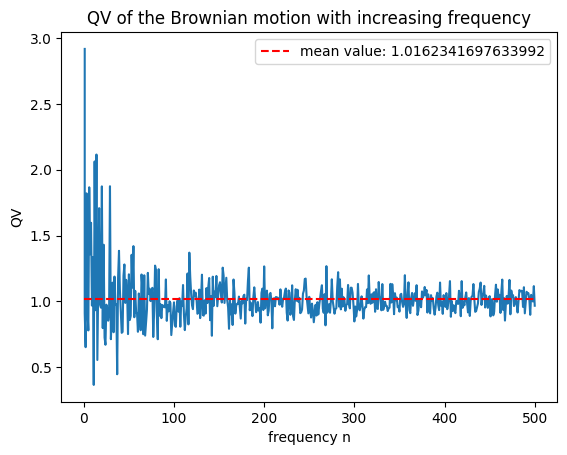

In [4]:
x = np.linspace(1, 500, 501, dtype=int)
y = [quadratic_variation(Brownian_motion(n, T), full_grid(n)) for n in x]


plt.plot(x, y)
plt.plot([np.mean(y) for i in range(len(x))], "--r", label=f"mean value: {np.mean(y)}")
plt.title("QV of the Brownian motion with increasing frequency")
plt.xlabel("frequency n")
plt.ylabel("QV")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


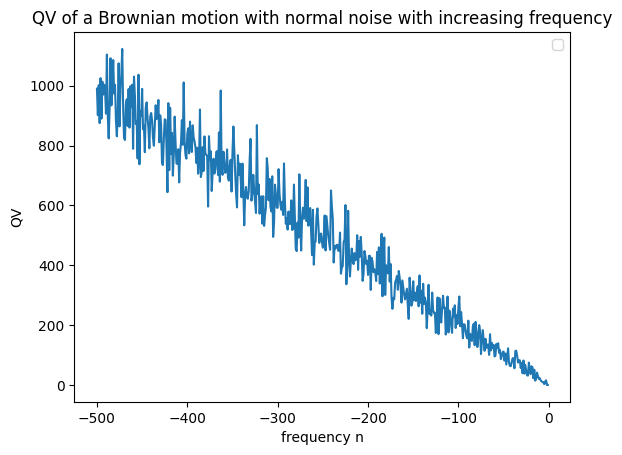

In [7]:
y = [quadratic_variation(Brownian_motion(n, T) + noise(n+1), full_grid(n)) for n in x]

plt.plot(-x, y)
# plt.plot([2*n for n in x], "-r", label=f"QV = 2n")
plt.title("QV of a Brownian motion with normal noise with increasing frequency")
plt.xlabel("frequency n")
plt.ylabel("QV")
plt.legend()

We observe what's said in the article that the naïve estimator of quadratic variation which is the realized volatility diverges to infinity linearly in n. Scaled by $(2n)^{-1}$, it estimates consistently the variance of microstructure noise.

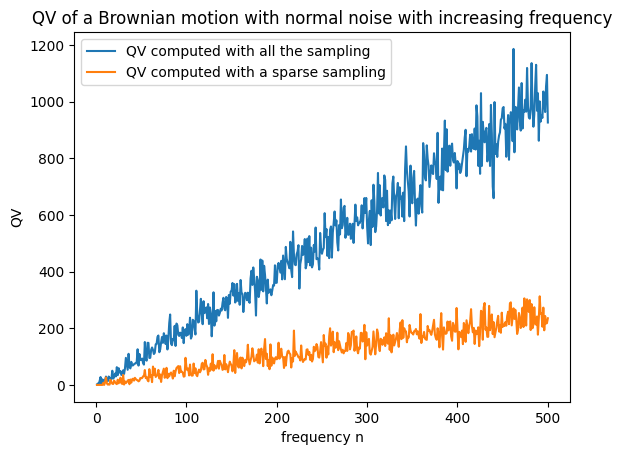

In [38]:
y2 = [quadratic_variation(Brownian_motion(n, T) + noise(n+1), np.linspace(0, n, n//4, dtype=int)) for n in x]

plt.plot(x, y, label="QV computed with all the sampling")
plt.plot(x, y2, label="QV computed with a sparse sampling")
plt.title("QV of a Brownian motion with normal noise with increasing frequency")
plt.xlabel("frequency n")
plt.ylabel("QV")
plt.legend()